In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def prep_files(file):
    log=pd.read_csv(file,sep='\t').dropna(axis=1)
    args=json.load(open(file.replace('log.txt','args.json'),'r'))
    name=''
    if args['lambda_mmd']>0:
        name +='ARC '
    if args['lambda_kd']>0:
        name +='AKC '
    acc = np.median(log['Test Acc.'].values[-10:])
    log['Epoch']=log['Epoch'].astype('int')
    data = {'log':log, 'args':args,'name':name,
            'acc':round(acc,5),'best_acc':round(log['Test Acc.'].max(),5),'file':file}
    return data

In [3]:
def EMA(x,miu=0.3):
    s=[x[0]]
    for i in x[1:]:
        new_i = s[-1]*miu + i*(1-miu)
        s.append(new_i)
    return np.array(s)
def plot_files_metric(result_list,ema_factor=0.3,title='CUB_200 @ 400 label'):
    keys = [ k for k in result_list[0]['log'].keys() if k not in ['Epoch','Time']]
    for k in keys:
        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel(k)
        for result in result_list:
            log = result['log']
            if k not in log:
                continue
            t=log['Epoch']
            y=EMA(log[k],ema_factor)
            plt.plot(t, y,label=result['name'])
        plt.legend()
        plt.grid()
        plt.title(title)
        plt.show()

In [4]:
files=['results/cub200@400/1/log.txt','results/cub200@400/2/log.txt']
results = [prep_files(file) for file in files]
results = sorted([x for x in results if len(x['log'])>0], key=lambda x:x['best_acc'],reverse=True)

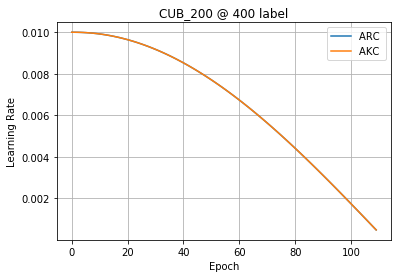

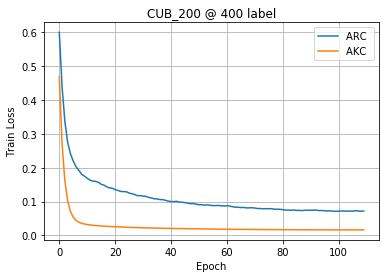

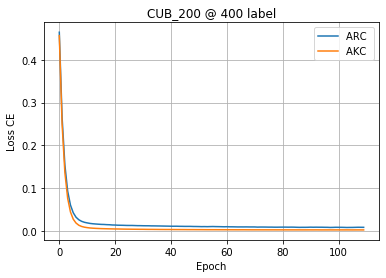

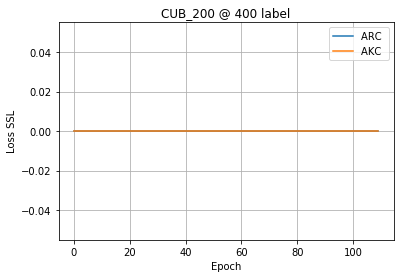

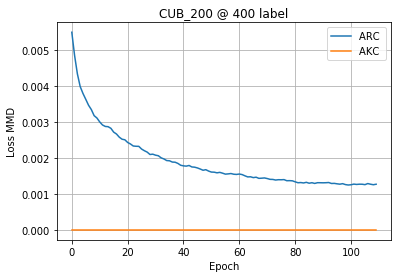

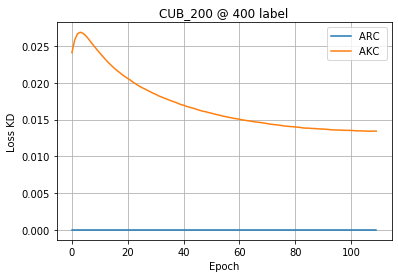

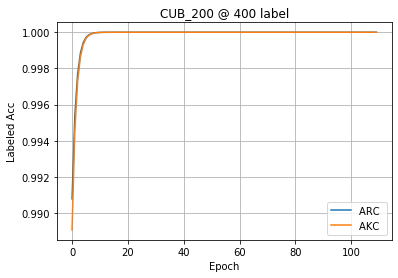

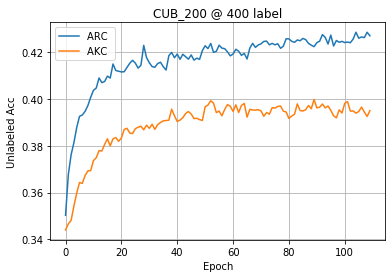

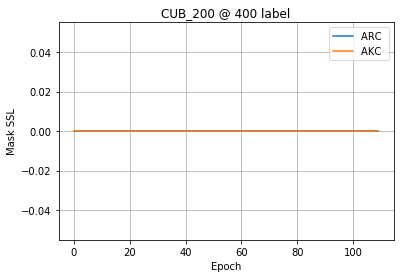

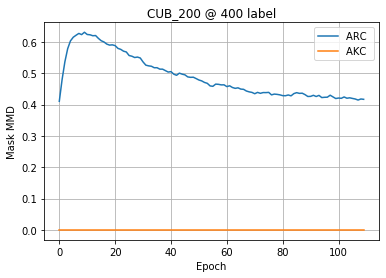

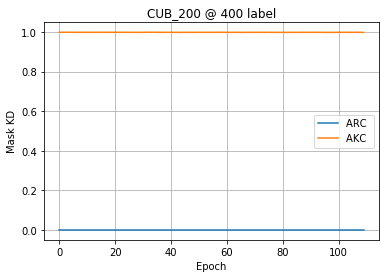

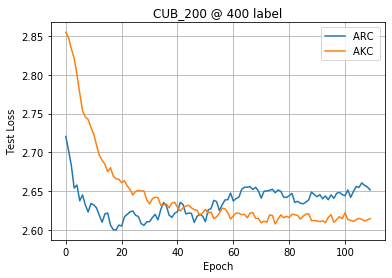

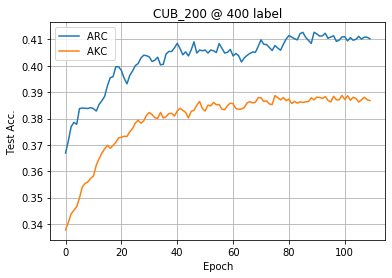

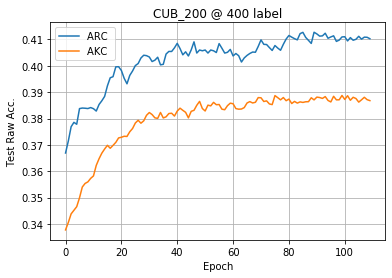

In [5]:
plot_files_metric(results,ema_factor=0.5)